Import Libraries

In [2]:
# import libraries
!pip3 install torch 
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

Mount Drive and Import Data Table


In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

# import and inspect the dataset
dataTable = pd.read_csv('DataTableFinal1.csv')
dataTable


,Sound ID,Sound Rank,Loudness,Sharpness,Roughness,Prominence Ratio,Loudness [sones],Sharpness [acum],Roughness [asper],Prominence Ratio [PR],...,Q3 Norm,Q4 Norm,Q1 Ave,Q2 Ave,Q3 Ave,Q4 Ave,Q1 Norm Ave,Q2 Norm Ave,Q3 Norm Ave,Q4 Norm Ave
0,X,10.X,-1,-1,1,-1,23.14,1.20,0.19,2.63,...,0.037933,0.012336,4.948551,3.477165,4.731387,34.496124,0.175553,-0.401563,0.136160,-0.273585
1,X,10.X,-1,-1,1,-1,23.14,1.20,0.19,2.63,...,-0.262808,0.012336,4.948551,3.477165,4.731387,34.496124,0.175553,-0.401563,0.136160,-0.273585
2,X,10.X,-1,-1,1,-1,23.14,1.20,0.19,2.63,...,-0.262808,0.298772,4.948551,3.477165,4.731387,34.496124,0.175553,-0.401563,0.136160,-0.273585
3,X,10.X,-1,-1,1,-1,23.14,1.20,0.19,2.63,...,-0.202660,-1.061799,4.948551,3.477165,4.731387,34.496124,0.175553,-0.401563,0.136160,-0.273585
4,X,10.X,-1,-1,1,-1,23.14,1.20,0.19,2.63,...,-0.864291,0.370381,4.948551,3.477165,4.731387,34.496124,0.175553,-0.401563,0.136160,-0.273585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,J,1.J,-1,-1,-1,-1,23.20,1.26,0.15,2.47,...,-1.646217,1.802562,2.972441,5.532117,3.183721,63.266667,-1.057492,0.825177,-0.891552,0.780201
2217,J,1.J,-1,-1,-1,-1,23.20,1.26,0.15,2.47,...,-0.443253,0.871644,2.972441,5.532117,3.183721,63.266667,-1.057492,0.825177,-0.891552,0.780201
2218,J,1.J,-1,-1,-1,-1,23.20,1.26,0.15,2.47,...,-0.563549,-0.488927,2.972441,5.532117,3.183721,63.266667,-1.057492,0.825177,-0.891552,0.780201
2219,J,1.J,-1,-1,-1,-1,23.20,1.26,0.15,2.47,...,-0.924439,0.728426,2.972441,5.532117,3.183721,63.266667,-1.057492,0.825177,-0.891552,0.780201


Organize the data into Tensors

In [13]:
# organize the data
# taking pre-normalized data from data table

# convert from pandas dataframe to tensor
x_data = torch.tensor( dataTable[dataTable.columns[14:18]].values ).float()
print(x_data)

y_data = torch.tensor( dataTable[dataTable.columns[18:22]].values ).float()
#print(y_data)

y_data_ave = torch.tensor( dataTable[dataTable.columns[26:30]].values ).float()
#print(y_data_ave)

tensor([[-1.2041, -1.1550,  0.6235, -0.9807],
        [-1.2041, -1.1550,  0.6235, -0.9807],
        [-1.2041, -1.1550,  0.6235, -0.9807],
        ...,
        [-1.1868, -0.7753, -0.0891, -1.0410],
        [-1.1868, -0.7753, -0.0891, -1.0410],
        [-1.1868, -0.7753, -0.0891, -1.0410]])


ANN Architecture: FWD Model

In [16]:
# model architecture
ANN_fwd = nn.Sequential(
    nn.Linear(4,15),   # input layer
    nn.Tanh(),
    nn.Linear(15,15),# hidden layer
    nn.Tanh(),
    nn.Linear(15,4)# output layer
      )

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANN_fwd.parameters(),lr=.01)

Train the FWD Model

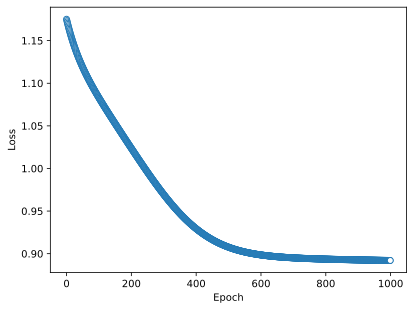

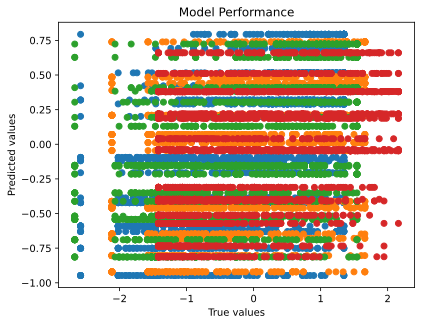

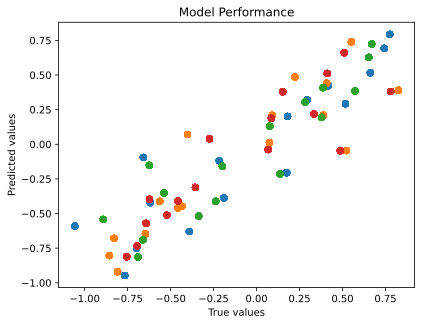

Average R-squared: 0.8882412075996399
Average RMSE: 0.17324847


In [19]:
# number of epochs
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANN_fwd(x_data)

  # compute loss
  loss = lossfun(yHat,y_data)
  losses[epochi] = loss

  # backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# compute model predictions
predictions = ANN_fwd(x_data)

# un-normalize predictions
#predictions_unnorm = predictions*std + mean

# plot the predictions (normalized) against the ground-truth
plt.plot(y_data,predictions.detach(),'o')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Model Performance')
plt.show()

# plot the predictions vs. true values
plt.plot(y_data_ave,predictions.detach(),'o')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Model Performance')
plt.show()

# perform cross-validation

# initialize lists to store evaluation metrics
r2_scores = []
rmse_scores = []

# set up k-fold cross-validation
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# iterate over folds
for train_index, test_index in kf.split(x_data):
  # split data into training and testing sets
  x_train, x_test = x_data[train_index], x_data[test_index]
  y_train, y_test = y_data[train_index], y_data[test_index]
  y_train_ave, y_test_ave = y_data[train_index], y_data_ave[test_index]

  # define loss function and optimizer
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANN_fwd.parameters(), lr=0.01)

  # train the model
  for epochi in range(numepochs):
    yHat = ANN_fwd(x_train)
    loss = lossfun(yHat, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # evaluate the model on the test set
  with torch.no_grad():
    predictions_test = ANN_fwd(x_test)
   # predictions_test_unnorm = predictions_test * std + mean
    r2 = r2_score(y_test_ave.numpy(), predictions_test.numpy())
    #r2 = r2_score(y_data[test_index].numpy(), predictions_test_ave.numpy())
    rmse = np.sqrt(mean_squared_error(y_test_ave.numpy(), predictions_test.numpy()))

  # store evaluation metrics
  r2_scores.append(r2)
  rmse_scores.append(rmse)

# print average evaluation metrics
print('Average R-squared:', np.mean(r2_scores))
print('Average RMSE:', np.mean(rmse_scores))

In [21]:
# prompt: run the above model ANN-fwd with given inputs of 28.6 1.17 0.16 -1.199

# Create a tensor with the given input values
input_tensor = torch.tensor([28.6, 1.17, 0.16, -1.199]).float()

# Use the ANN_fwd model to make a prediction
prediction = ANN_fwd(input_tensor)

# Print the prediction
prediction

tensor([ 0.1679, -0.0241,  0.2284, -0.1808], grad_fn=<ViewBackward0>)

Show Forward Model Weights

In [23]:
# Get the weights of the model
weights = []
for param in ANN_fwd.parameters():
  weights.append(param.data)

# Print the weights
for i, weight in enumerate(weights):
  print(f"Layer {i+1} weights:\n{weight}\n")

Layer 1 weights:
tensor([[ 0.0869,  0.0505,  0.4294,  0.1281],
        [ 0.1100,  0.0342, -0.6753,  0.2487],
        [ 0.4061,  0.0344, -0.1341,  0.0161],
        [-0.0686,  0.0854,  0.4305,  0.4405],
        [-0.2232, -0.3265,  0.1381, -0.5320],
        [-0.3190,  0.3766,  0.5233,  0.2485],
        [-0.4720, -0.2828,  0.3796, -0.2703],
        [-0.4392,  0.0292,  0.4515, -0.4444],
        [-0.1088,  0.0722, -0.3038, -0.0477],
        [ 0.3750,  0.2630, -0.5058, -0.2637],
        [-0.3605, -0.5086,  0.6079, -0.1229],
        [-0.0594, -0.3329, -0.1535,  0.3419],
        [-0.4030,  0.1307, -0.2210,  0.3745],
        [ 0.0152,  0.1153,  0.6248,  0.3478],
        [-0.1795, -0.2009,  0.9138,  0.6802]])

Layer 2 weights:
tensor([ 0.3136,  0.5180, -0.3911,  0.3167, -0.3177,  0.2292,  0.3872,  0.3448,
         0.4692,  0.0370,  0.3512,  0.2254, -0.2257, -0.2866,  0.1058])

Layer 3 weights:
tensor([[-0.1781,  0.0669,  0.2286,  0.0085,  0.1410, -0.2401,  0.2426, -0.2477,
          0.1297, -0.05